In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
btc = pd.read_csv('BTC-GBP (1).csv')
snp = pd.read_csv('^GSPC (1).csv')
#print(btc.head(5),snp.head(5))

In [3]:
import os
import datetime
#from pandas_datareader.data import web


#tickers = ['CMS','CSX','MSFT','JPM']
#start = datetime.datetime(2018, 10, 8)
#end = datetime.datetime(2019, 10, 15)
#btc = pd.DataFrame([wb('BTC', 'yahoo', start, end)].all()).T
#snp = pd.DataFrame([wb('GSPC', 'yahoo', start, end)].all()).T
#df.columns = tickers

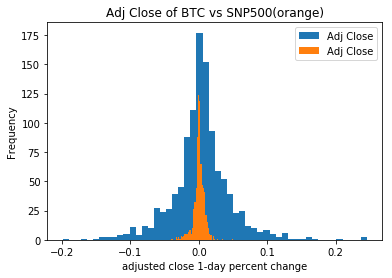

In [4]:
btc['Adj Close'].pct_change().plot.hist(bins=50)
snp['Adj Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.title('Adj Close of BTC vs SNP500(orange)')
plt.legend()
plt.show()

In [5]:
btc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1.095000e+03
mean,4587.031972,4715.807062,4447.851960,4592.741046,4592.741046,5.714271e+09
std,2814.846688,2918.457184,2685.608004,2813.194387,2813.194387,5.941202e+09
min,558.381348,559.772217,545.531372,558.408386,558.408386,4.214888e+07
25%,2573.786010,2636.013184,2517.948486,2580.149536,2580.149536,1.172069e+09
50%,4747.299316,4864.120605,4679.746094,4769.371094,4769.371094,3.750315e+09
75%,6368.512207,6485.760743,6188.439941,6360.076904,6360.076904,8.023261e+09
max,14622.570313,15082.963867,14246.958984,14638.787109,14638.787109,3.552938e+10


In [6]:
snp.describe()

,Open,High,Low,Close,Adj Close,Volume
count,754.000000,754.000000,754.000000,754.000000,754.000000,7.540000e+02
mean,2659.814178,2670.705424,2647.818010,2660.046179,2660.046179,3.539862e+09
std,226.652752,228.159858,224.702442,226.293640,226.293640,6.223064e+08
min,2162.709961,2165.919922,2151.169922,2164.199951,2164.199951,1.349780e+09
25%,2463.835083,2469.084900,2451.495056,2464.732605,2464.732605,3.200278e+09
50%,2693.130005,2717.074951,2681.864990,2699.129883,2699.129883,3.468440e+09
75%,2841.644958,2853.210022,2825.785035,2840.667480,2840.667480,3.790545e+09
max,3087.020020,3097.770020,3080.229980,3093.080078,3093.080078,7.609010e+09


In [7]:
btci = pd.DataFrame.merge(snp,btc,on='Date',how='left')
btci.head(10)

,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,2016-11-10,2167.489990,2182.300049,2151.169922,2167.479980,2167.479980,6451640000,582.046875,581.671753,567.062683,570.237488,570.237488,54835671
1,2016-11-11,2162.709961,2165.919922,2152.489990,2164.449951,2164.449951,4988050000,570.254211,568.604431,568.571411,568.625305,568.625305,50098976
2,2016-11-14,2165.639893,2171.360107,2156.080078,2164.199951,2164.199951,5367200000,558.381348,565.524841,557.349487,563.340759,563.340759,50333999
3,2016-11-15,2168.290039,2180.840088,2166.379883,2180.389893,2180.389893,4543860000,563.958435,574.827759,564.027527,571.535645,571.535645,57857598
4,2016-11-16,2177.530029,2179.219971,2172.199951,2176.939941,2176.939941,3830590000,571.172607,600.976685,568.550232,598.422302,598.422302,113616918
5,2016-11-17,2178.610107,2188.060059,2176.649902,2187.120117,2187.120117,3809160000,598.967468,608.164978,595.803223,597.128662,597.128662,87500201
6,2016-11-18,2186.850098,2189.889893,2180.379883,2181.899902,2181.899902,3572400000,596.909485,606.673645,593.978760,608.916016,608.916016,70779473
7,2016-11-21,2186.429932,2198.699951,2186.429932,2198.179932,2198.179932,3607010000,593.462952,595.139221,592.321411,591.919250,591.919250,48684762
8,2016-11-22,2201.560059,2204.800049,2194.510010,2202.939941,2202.939941,3957940000,592.235596,608.450378,589.929504,604.949280,604.949280,104594202
9,2016-11-23,2198.550049,2204.719971,2194.510010,2204.719971,2204.719971,3418640000,605.266541,605.871460,594.611755,599.367310,599.367310,61614585


In [8]:
import talib

In [9]:
b = btci.iloc[:,11].values.astype(float)
t = btci.iloc[:,8].values.astype(float)
c = btci.iloc[:,9].values.astype(float)
bi = btci.iloc[:,12].values.astype(float)
bx = btci.iloc[:,5].values.astype(float)
tx = btci.iloc[:,2].values.astype(float)
cx = btci.iloc[:,3].values.astype(float)
bix = btci.iloc[:,6].values.astype(float)

In [10]:
feature_names = []  # a list of the feature names for 

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14,30,50,200]:

    # Create the moving average indicator and divide by Adj_Close
    #btci['ma' + str(n)] = talib.SMA(b,timeperiod=n) / b
    
    # Create the RSI indicator
    btci['rsi' + str(n)] = talib.RSI(b, timeperiod=n)
    
    # Create the CCI indicator
    btci['cci' + str(n)] = talib.CCI(t,c,b, timeperiod=n)
    
    # Create the MFI indicator
    btci['mfi' + str(n)] = talib.MFI(t , c, b, bi, timeperiod=n)
    
    # Create the moving average indicator and divide by Adj_Close
    #btci['max' + str(n)] = talib.SMA(bx,timeperiod=n) / bx
    
    # Create the RSI indicator
    btci['rsix' + str(n)] = talib.RSI(bx, timeperiod=n)
    
    # Create the CCI indicator
    btci['ccix' + str(n)] = talib.CCI(tx,cx,bx, timeperiod=n)
    
    # Create the MFI indicator
    btci['mfix' + str(n)] = talib.MFI(tx , cx, bx, bix, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ["""'ma' + str(n),""" 'rsi' + str(n), 'cci' + str(n), 'mfi' + str(n),"""'max' + str(n),""" 'rsix' + str(n)
                                     , 'ccix' + str(n), 'mfix' + str(n)]

print(feature_names)

["'ma' + str(n),rsi14", 'cci14', 'mfi14', "'max' + str(n),rsix14", 'ccix14', 'mfix14', "'ma' + str(n),rsi30", 'cci30', 'mfi30', "'max' + str(n),rsix30", 'ccix30', 'mfix30', "'ma' + str(n),rsi50", 'cci50', 'mfi50', "'max' + str(n),rsix50", 'ccix50', 'mfix50', "'ma' + str(n),rsi200", 'cci200', 'mfi200', "'max' + str(n),rsix200", 'ccix200', 'mfix200']


In [11]:
btci['5_day_fut_pct'] = pd.DataFrame(btci.iloc[:,-1].values).shift(-5).pct_change(5)


In [12]:
btci['5_day_fut_close'] = pd.DataFrame(btci.iloc[:,11].values).shift(-5)

In [13]:
btci = btci.dropna(axis=0).drop('Date',axis=1)
print(btci.head())
print(btci.describe())

          Open_x       High_x        Low_x      Close_x  Adj Close_x  \
200  2431.939941  2449.189941  2428.199951  2446.300049  2446.300049   
201  2446.060059  2460.310059  2443.770020  2457.590088  2457.590088   
202  2462.649902  2475.010010  2462.649902  2471.649902  2471.649902   
203  2474.419922  2480.379883  2473.850098  2476.550049  2476.550049   
204  2470.350098  2471.969971  2446.550049  2457.850098  2457.850098   

       Volume_x       Open_y       High_y        Low_y      Close_y  \
200  2737580000  3396.169922  3580.247803  3356.829834  3543.584717   
201  2633660000  3536.882813  3577.021729  3458.969727  3534.060791   
202  3348110000  3526.544189  3663.688232  3522.025146  3635.611084   
203  2710730000  3634.350830  3776.738770  3622.835449  3776.738770   
204  3490260000  3272.163818  3397.406494  3093.794189  3356.234619   

          ...            ccix50     mfix50     rsi200      cci200     mfi200  \
200       ...        -37.158928  49.434901  65.377341  225.2

In [14]:
corr = btci.corr()
print(corr)

                   Open_x    High_x     Low_x   Close_x  Adj Close_x  \
Open_x           1.000000  0.996434  0.993288  0.989771     0.989771   
High_x           0.996434  1.000000  0.991305  0.993794     0.993794   
Low_x            0.993288  0.991305  1.000000  0.995456     0.995456   
Close_x          0.989771  0.993794  0.995456  1.000000     1.000000   
Adj Close_x      0.989771  0.993794  0.995456  1.000000     1.000000   
Volume_x        -0.094446 -0.072970 -0.142522 -0.117349    -0.117349   
Open_y           0.357331  0.355110  0.360651  0.355931     0.355931   
High_y           0.335537  0.333196  0.339260  0.334373     0.334373   
Low_y            0.378094  0.375868  0.381436  0.376922     0.376922   
Close_y          0.350459  0.348474  0.354240  0.350244     0.350244   
Adj Close_y      0.350459  0.348474  0.354240  0.350244     0.350244   
Volume_y         0.610284  0.616788  0.607699  0.614269     0.614269   
rsi14           -0.019441 -0.033164  0.005426 -0.008661    -0.00

In [15]:
import seaborn as sns

<function matplotlib.pyplot.show(*args, **kw)>

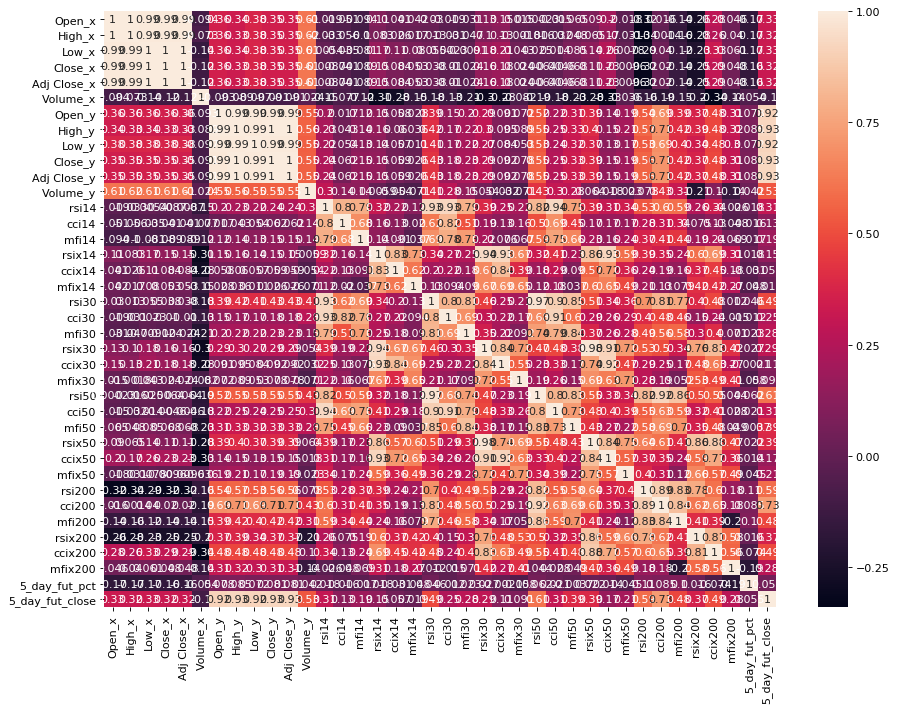

In [16]:

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show  # show the plot

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, Normalizer, StandardScaler

In [18]:
#btc_sc = scale(btci.iloc[:,13:36].values)
sc= StandardScaler()
X_train = sc.fit_transform(btci.drop(labels='Volume_x',axis=1).iloc[0:419,0:11].values)
X_test = sc.fit_transform(btci.drop(labels='Volume_x',axis=1).iloc[419:718,0:11].values)
y_train = btci.iloc[0:419,-1].values
y_test = btci.iloc[419:718,-1].values

In [19]:
lm_model = LinearRegression()

In [20]:
lm_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
pred = lm_model.predict(X_test)

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(lm_model.score(X_train,y_train))

0.8761319504276088


In [24]:
print(lm_model.score(X_test,y_test))

-4.105193538812314


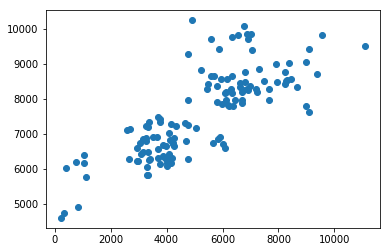

In [25]:
plt.plot(pred,y_test,'o')
plt.show()

In [26]:
from sklearn.svm import SVR

In [27]:
sv_model = SVR()

In [28]:
sv_model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
predsv = sv_model.predict(X_test)

In [30]:
print(sv_model.score(X_test,y_test))

-4.612868895292688


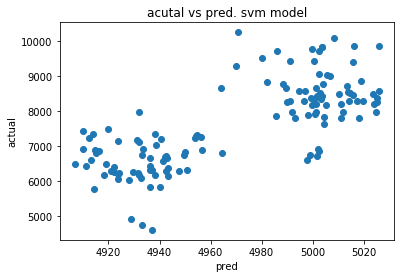

In [31]:
plt.plot(predsv,y_test, 'o')
plt.title('acutal vs pred. svm model')
plt.xlabel('pred')
plt.ylabel('actual')
plt.show()

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
kn_model = KNeighborsRegressor()

In [34]:
kn_model.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [35]:
predkn = kn_model.predict(X_test)

In [36]:
predkntr = kn_model.predict(X_train)

In [37]:
print(kn_model.score(X_test,y_test))

-4.154809381268775


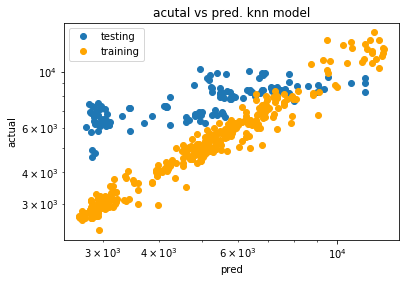

In [38]:
plt.plot(predkn,y_test, 'o',label='testing')
plt.plot(predkntr,y_train, 'o',c='orange',label='training')
plt.yscale('log')
plt.xscale('log')
plt.title('acutal vs pred. knn model')
plt.xlabel('pred')
plt.ylabel('actual')
plt.legend()
plt.show()

In [39]:
import keras
#from keras.layers import Dense
#from keras.models import Sequential
#Building the RNN LSTM model
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\Aimazin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Aimazin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Aimazin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Aimazin\Anaconda3\lib\site-packages\tensorflow\python\framework\d

In [40]:

mu, sigma = 0, 0.1 
# creating a noise with the same dimension as the dataset (2,2) 
noise = np.random.normal(mu, sigma, [419,11])
X_traini=X_train +noise
# Creating a data structure with 60 timesteps and 1 output
X_trainx = []
y_trainx = []
for i in range(60, 419):
    X_trainx.append(X_train[i-60:i, 0])
    y_trainx.append(y_train[i])
X_trainx, y_trainx = np.array(X_trainx), np.array(y_trainx)

# Reshaping
X_trainx = np.reshape(X_trainx, (X_trainx.shape[0], X_trainx.shape[1], 1))

In [41]:
# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(Dense(256, activation='relu', input_shape=[11]))
#,LSTM(units = 50, return_sequences = True, input_shape = (X_trainx.shape[1], 1)))
              
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(Dense(128, activation='relu'))#,LSTM(units = 50, return_sequences = True))
"""
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))"""

# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'RMSprop', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
#regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 2000

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

regressor.fit(
  X_traini, y_train,
  epochs=EPOCHS, validation_split = 0.3, verbose=0, batch_size=32,
  callbacks=[early_stop, PrintDot()])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................
................

In [42]:
# Calculate predictions: predictions
prednn = regressor.predict(X_test)


In [43]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [44]:

#tnn[0:4]
print(mean_absolute_error(y_test,prednn))
print(np.sqrt(mean_squared_error(y_test,prednn)))

2216.1461858169473
2479.608968273066


No handles with labels found to put in legend.


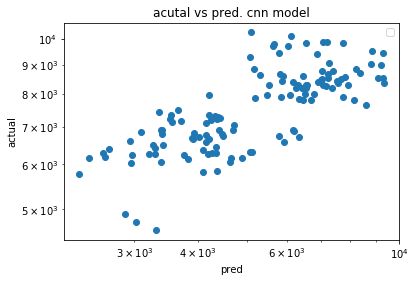

In [45]:
plt.plot(prednn,y_test,'o')
#plt.plot(prednntr,y_train, 'o',c='orange',label='training')
plt.yscale('log')
plt.xscale('log')
plt.title('acutal vs pred. cnn model')
plt.xlabel('pred')
plt.ylabel('actual')
plt.legend()
plt.show()

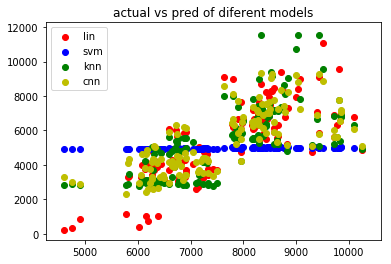

In [46]:
# Create a scatter plot with train and test actual vs predictions
plt.scatter(y_test, pred, label='lin',c='r')
plt.scatter(y_test,predsv,label='svm',c='b')
plt.scatter(y_test, predkn, label='knn',c='g')
plt.scatter(y_test,prednn,label='cnn',c='y')
#plt.yscale('log')
#plt.xscale('log')
plt.title('actual vs pred of diferent models')
plt.legend()
plt.show()


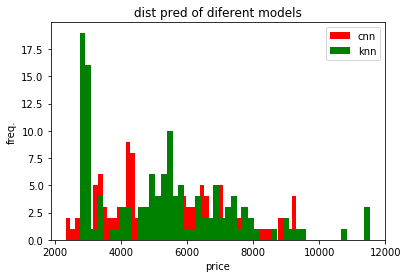

In [47]:
# Create a histogram plot with train and test actual vs predictions
plt.hist( prednn,bins=50, label='cnn',color='r')
#plt.hist(predsv,bins=50, label='svm',color='b')
plt.hist( predkn,bins=50, label='knn',color='g')
#plt.hist(prednn,label='nn',color='y')
#plt.yscale('log')
#plt.xscale('log')
plt.title('dist pred of diferent models')
plt.xlabel('price')
plt.ylabel('freq.')
plt.legend()
plt.show()

In [73]:

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

In [76]:
rfr = XGBRegressor()
rfr.fit(X_train,y_train)
predxg= rfr.predict(X_test)

In [48]:
import scipy.optimize as spo

In [49]:
datai = pd.DataFrame([y_test[:].astype(float),predkn[:].astype(float)])
datai.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,4597.476563,4745.940430,4907.248535,6029.207031,6193.474121,6386.787598,6161.047363,5773.954590,6268.142578,6266.939941,...,7200.357910,7328.546875,7135.303223,7109.577148,7156.055176,7302.200684,7253.519531,7280.433594,7228.910645,6892.275879
1,2831.151855,2876.947021,2831.151855,2752.171142,2919.649951,2863.755567,2930.659326,2818.678613,3066.261670,2948.399902,...,3444.019043,2971.896826,3030.671436,2952.499756,3430.844385,4102.751758,4145.533887,4145.533887,4165.826172,4907.950879


In [50]:
data=np.asarray([predkn[:].astype(int),y_test[:].astype(int)])
data= pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,2831,2876,2831,2752,2919,2863,2930,2818,3066,2948,...,3444,2971,3030,2952,3430,4102,4145,4145,4165,4907
1,4597,4745,4907,6029,6193,6386,6161,5773,6268,6266,...,7200,7328,7135,7109,7156,7302,7253,7280,7228,6892


In [51]:
datan=np.asarray([prednn[:,0].astype(int),y_test[:].astype(int)])
datan= pd.DataFrame(datan)
datan.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,3303,3027,2870,2948,2618,2666,2434,2333,3202,3288,...,4241,4206,3558,4153,3698,4328,4417,4380,4373,4688
1,4597,4745,4907,6029,6193,6386,6161,5773,6268,6266,...,7200,7328,7135,7109,7156,7302,7253,7280,7228,6892


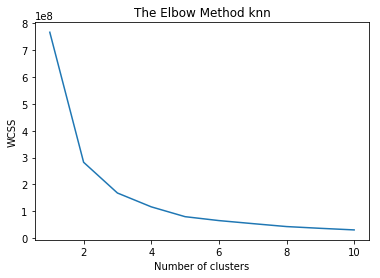

In [52]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data.transpose())
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method knn')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

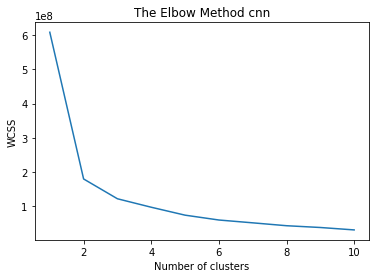

In [53]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(datan.transpose())
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method cnn')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data.transpose())

In [55]:
data = data.transpose()
data=pd.DataFrame(data)
data.head()
y_kmeans=pd.DataFrame(y_kmeans)
y_kmeans.head()
data['km']=y_kmeans

In [56]:

# Fitting K-Means to the dataset
kmeansn = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeansn = kmeansn.fit_predict(datan.transpose())

In [57]:
datan = datan.transpose()
datan=pd.DataFrame(datan)
datan.head()
y_kmeansn=pd.DataFrame(y_kmeansn)
y_kmeansn.head()
datan['km']=y_kmeansn


In [58]:
lin=pd.DataFrame(kmeans.cluster_centers_[:,:]).drop(index=1)
linn=pd.DataFrame(kmeansn.cluster_centers_[:,:]).drop(index=1)


In [59]:
print(lin.iloc[0,1:3].values)

[8657.]


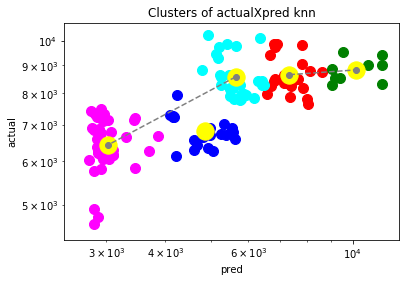

In [60]:

# Visualising the clusters
plt.scatter(data[data['km'] == 0][0], data[data['km'] == 0][1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data[data['km'] == 1][0], data[data['km'] == 1][1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data[data['km'] == 2][0], data[data['km'] == 2][1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data[data['km'] == 3][0], data[data['km'] == 3][1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data[data['km'] == 4][0], data[data['km'] == 4][1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.plot(lin.iloc[0:2,0].values,lin.iloc[0:2,1].values,c='grey',marker='o', linestyle='dashed')
plt.plot(lin.iloc[2:4,0].values,lin.iloc[2:4,1].values,c='grey',marker='o', linestyle='dashed')
plt.yscale('log')
plt.xscale('log')
plt.title('Clusters of actualXpred knn')
plt.xlabel('pred')
plt.ylabel('actual')
#plt.legend()
plt.show()

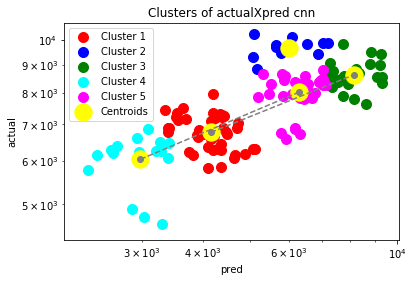

In [61]:

# Visualising the clusters
plt.scatter(datan[datan['km'] == 0][0], datan[datan['km'] == 0][1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(datan[datan['km'] == 1][0], datan[datan['km'] == 1][1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(datan[datan['km'] == 2][0], datan[datan['km'] == 2][1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(datan[datan['km'] == 3][0], datan[datan['km'] == 3][1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(datan[datan['km'] == 4][0], datan[datan['km'] == 4][1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansn.cluster_centers_[:, 0], kmeansn.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.plot(linn.iloc[0:2,0].values,linn.iloc[0:2,1].values,c='grey',marker='o', linestyle='dashed')
plt.plot(linn.iloc[2:4,0].values,linn.iloc[2:4,1].values,c='grey',marker='o', linestyle='dashed')
plt.yscale('log')
plt.xscale('log')
plt.title('Clusters of actualXpred cnn')
plt.xlabel('pred')
plt.ylabel('actual')
plt.legend()
plt.show()

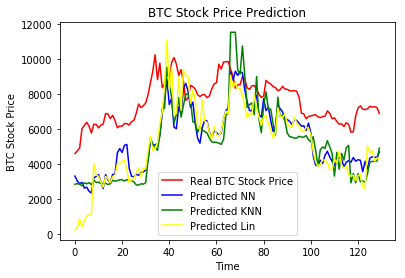

In [62]:
# Visualising the results
plt.plot(y_test, color = 'red', label = 'Real BTC Stock Price')
plt.plot(prednn, color = 'blue', label = 'Predicted NN')
plt.plot(predkn, color = 'green', label = 'Predicted KNN')
plt.plot(pred, color = 'yellow', label = 'Predicted Lin')
plt.title('BTC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Stock Price')
plt.legend()
plt.show()

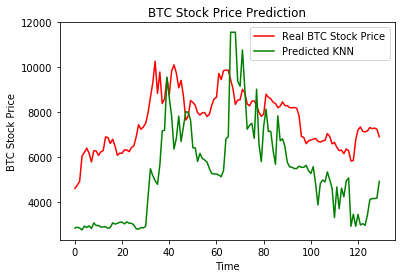

In [63]:
# Visualising the results
plt.plot(y_test, color = 'red', label = 'Real BTC Stock Price')
#plt.plot(prednn, color = 'blue', label = 'Predicted NN')
plt.plot(predkn, color = 'green', label = 'Predicted KNN')
#plt.plot(pred, color = 'yellow', label = 'Predicted Lin')
plt.title('BTC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Stock Price')
plt.legend()
plt.show()

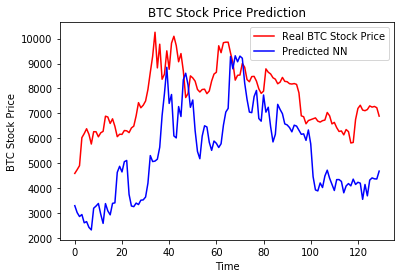

In [64]:
# Visualising the results
plt.plot(y_test, color = 'red', label = 'Real BTC Stock Price')
plt.plot(prednn, color = 'blue', label = 'Predicted NN')
#plt.plot(predkn, color = 'green', label = 'Predicted KNN')
#plt.plot(pred, color = 'yellow', label = 'Predicted Lin')
plt.title('BTC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Stock Price')
plt.legend()
plt.show()

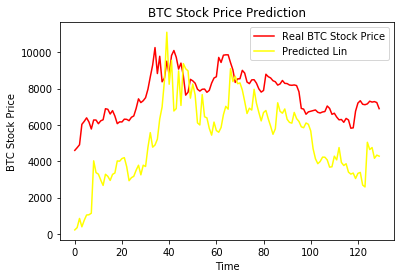

In [65]:
# Visualising the results
plt.plot(y_test, color = 'red', label = 'Real BTC Stock Price')
#plt.plot(prednn, color = 'blue', label = 'Predicted NN')
#plt.plot(predkn, color = 'green', label = 'Predicted KNN')
plt.plot(pred, color = 'yellow', label = 'Predicted Lin')
plt.title('BTC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Stock Price')
plt.legend()
plt.show()

In [66]:
xprednn=np.asarray(regressor.predict(X_train))
X=pd.DataFrame(xprednn).rename(columns={0:'red'})
t=(pd.DataFrame(btci.drop(labels='Volume_x',axis=1).iloc[0:419,0:11].values))
X.head()

,red
0,4272.912598
1,4287.510742
2,4321.204102
3,4379.464355
4,4063.402344


In [67]:
xt=X.join(t)
X_trainsup = sc.fit_transform(xt)
r=pd.DataFrame(btci.drop(labels='Volume_x',axis=1).iloc[419:718,0:11].values)
Xt=pd.DataFrame(prednn).rename(columns={0:'red'})
xtr=Xt.join(r)
X_testsup = sc.fit_transform(xtr)
#y_train = btci.iloc[0:419,-1].values
#y_test = btci.iloc[419:718,-1].values

C:\Users\Aimazin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aimazin\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Aimazin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aimazin\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [68]:
btci.columns
h=btci[['5_day_fut_close','Open_x', 'High_x', 'Low_x', 'Close_x', 'Adj Close_x',
       'Open_y', 'High_y', 'Low_y', 'Close_y', 'Adj Close_y', 'Volume_y' ]]
h=h.rename(columns={'Adj Close_x':'x','Adj Close_y':'y','5_day_fut_close':'suc'})
#hxy.columns
h.suc=h.suc.astype(int)

In [69]:
from statsmodels.tools import eval_measures
import statsmodels.api as sm
import statsmodels.formula.api as smf

def get_best_model(train, test):
    # Step 1: specify the form of the model
    model_formula = " suc ~  \
    Open_x +  High_x + Low_x +  Close_x + x + Open_y +\
    High_y + Low_y + Close_y + y + Volume_y"
    
    grid =( 10** np.arange(0, 30, dtype=np.float64)).astype(int)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.Poisson())#Gaussian())#NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.suc)#.astype(int))

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.Poisson())#Gaussian())#NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model 

In [70]:
sj_train_subtrain = h.head(419)
sj_train_subtest = h.tail(h.shape[0] - 419)
hr = h.head(300)
ht = h.tail(h.shape[0] - 300)
g = pd.concat([hr,ht])
g.head()

best_model = get_best_model(sj_train_subtrain, sj_train_subtest)

best alpha =  []
best score =  1000


In [71]:
predstat=best_model.predict(sj_train_subtest.reset_index())

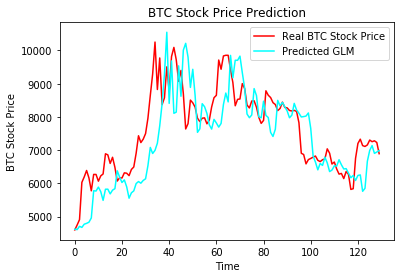

In [72]:
# Visualising the results
plt.plot(y_test, color = 'red', label = 'Real BTC Stock Price')
#plt.plot(prednn, color = 'blue', label = 'Predicted NN')
#plt.plot(predkn, color = 'green', label = 'Predicted KNN')
plt.plot(predstat, color = 'cyan', label = 'Predicted GLM')
plt.title('BTC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Stock Price')
plt.legend()
plt.show()

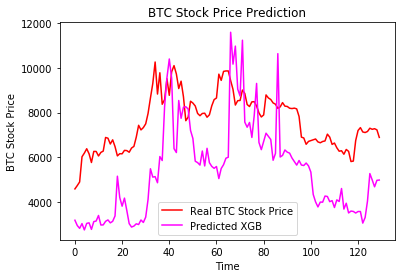

In [77]:
# Visualising the results
plt.plot(y_test, color = 'red', label = 'Real BTC Stock Price')
#plt.plot(prednn, color = 'blue', label = 'Predicted NN')
#plt.plot(predkn, color = 'green', label = 'Predicted KNN')
plt.plot(predxg, color = 'magenta', label = 'Predicted XGB')
plt.title('BTC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Stock Price')
plt.legend()
plt.show()